# Modelo para la predicción de resultados de fútbol
*Nombre: Antonio Peña Martínez*

*Agosto 2024*

Para desarrollar nuestro modelo seguiremos el modelo **Cross Industry Standard Process**, más una última etapa de "Model Management". Aunque éste sea un proceso iterativo, en este TFM, por simplicidad, nos centraremos en recorrer cada una de sus etapas de forma lineal.

# Business Understanding
El objetivo de este TFM es buscar patrones en las apuestas deportivas realizadas en las principales casas de apuestas que nos permitan predecir el resultado de partidos de fútbol. Para ello, entrenaremos y validaremos nuestro modelo con los partidos que se han jugado en las últimas 4 semanas, respecto al momento en el que se está desarrollando este TFM: del **16 de Julio de 2024 al 12 de Agosto de 2024**.

Todos sabemos que en el mundo de las apuestas deportivas el azar juega un papel muy importante, sin embargo, también es cierto que normalmente los equipos al final de una liga, salvo excepciones, suelen acabar siempre en posiciones similares, por lo que quizá, aparte de dicha posición, los resultados también podrían ser predecibles y para comprobarlo vamos a hacer uso de las tecnologías de Machine Learning que hemos aprendido.

Respecto al período seleccionado para la captura de datos, éste ha sido motivado por el momento en el que se ha desarrollado este TFM pero hay que tener en consideración que durante este período las principales ligas europeas no están activas y que la Eurocopa ya ha finalizado. En un principio podríamos pensar que esto es un hándicap ya que si, por ejemplo, deseamos predecir partidos de la Liga Española parece razonable pensar que deberíamos capturar el histórico de datos de los partidos de Liga Española y así obtendríamos un modelo mucho más ajustado a nuestra variable objetivo. Sin embargo, hemos de tener en cuenta que la propuesta de este TFM es realizar la predicción en base al valor de las distintas apuestas que se realizan de los partidos, considerando que estos valores llevan implícito el contexto en las que se desarrolla un partido, el histórico de resultados de los equipos, etc. Así que, más que datos de la liga donde se juega el partido que deseamos predecir, lo que necesitaremos, como siempre, para poder entrenar y validar nuestro modelo es un número suficiente de datos, en nuestro caso, de puestas deportivas y resultados finales. Por tanto, teniendo esto en cuenta y sabiendo que en el período seleccionado, en Europa no, pero en otros continentes sí hay ligas activas y, además, también disponemos de los datos de los partidos disputados durante las Olimpiadas de París 2024, concluimos que el período seleccionado es suficientemente válido para continuar con nuestro ejercicio.

Respecto a las apuestas en las que nos basaremos para intentar predecir el resultado cabe destacar que éste es un dato que va evolucionando a lo largo del tiempo conforme se va acercando la hora del partido o incluso durante la disputa del mismo. Sin embargo, en este TFM vamos a basarnos en el último estado de las apuestas que hay disponibles, momentos antes del comienzo del partido, ya que se supone que estas apuestas contendrán implícitamente información más certera y valiosa para poder realizar nuestra predicción. Por ejemplo: alineaciones confirmadas, lesionados de última hora, información climatológica que pueda afectar a uno u otro equipo, últimas declaraciones de los protagonistas antes del partido, sensación de las aficiones y sentimiento de las redes sociales, número de seguidores desplazados y, en general, cualquier noticia de última hora relacionada con el partido.

Ahora bien, aparte de considerar el estado de las apuestas justo antes del partido, una posible mejora que se podría implementar para aumentar nuestra tasa de acierto sería capturar dicho estado pero en distintos momentos antes de la disputa del partido ya que estas series temporales también podrían ser útiles para la predicción del resultado final. Sin embargo, en este TFM nos centraremos en el estado de las apuestas en un momento estático.

Tras finalizar nuestro ejercicio esperamos obtener un modelo que nos proporcione predicción de resultados de partidos de fútbol. A partir de aquí, si la evaluación del modelo es adecuada, nuestro modelo de negocio se debería completar analizando lo que se paga en cada tipo de apuesta y casa de apuestas, su relación con el riesgo que tiene la apuesta (que habría también que calcular), etc. para así terminar definiendo una estrategia de apuestas que implementaríamos, a ser posible, de forma automática a través de las APIs que exponen las propias casas de apuestas. Sin embargo, esta última fase de definición y ejecución de las estrategias de apuestas, aunque está relacionado con la estadística y también se podrían aplicar técnicas de aprendizaje automático, queda fuera del alcance de este TFM.

Finalmente, comentar que en este TFM hemos fijado como variable objetivo de nuestra predicción el resultado final del partido, sin embargo, cabría la posibilidad de escoger otras variables (ej. número de goles del partido, equipo ganador, etc.) en función, por ejemplo, de la estrategia de puestas que se haya definido. En cualquier caso, consideramos que el resultado final del partido es un buen punto de partida como variable objetivo dada su importancia, dejando para un ciclo posterior del proceso su evaluación y posible cambio o complemento con otras variables. 

Como caso práctico, el resultado que vamos a intentar predecir es el de Supercopa de Europa que se juega el día **14 de Agosto de 2024 a las 21.00**, entre el **Real Madrid y el Atalanta**, en el **Estadio Nacional de Varsovia, Polonia**. Consideramos que este partido es un buen ejemplo para validar el modelo de negocio aquí planteado ya que se juega entre equipos que sólo se han enfrentado en dos ocasiones previamente: en la ida y vuelta de los octavos de final de la Champions League 2020/21. Por tanto, se trata de un partido del que no disponemos mucha información histórica. De hecho, los dos enfrentamientos previos no formarán parte del entrenamiento de nuestro modelo. Además, es importante destacar también que en el momento del partido, es difícil medir el estado de forma en el que se encuentran ambos equipos por estar en pretemporada, aparte de las  altas y bajas que ambos equipos han tenido respecto a la temporarada anterior. Sin embargo, nuestro modelo, basado en el estado de las apuestas deportivas, debería ser independiente de toda esta casuísitica, o mejor dicho, que toda esta casuística está ya considerada en el valor de las apuestas.

Continuemos con nuestro ejercicio para ver qué resultado predecimos para nuestro partido objetivo y, una vez disputado, podremos comparar su resultado con lo que habíamos predicho. Por cierto, en ambos ocasiones previas en las que se enfrentaron ambos equipos ganó el Real Madrid: La ida fue en Italia, donde los merengues ganaron 0-1 con un golazo de Mendy y la vuelta, en el Bernabéu, fue 3-1 con goles de Benzema, Sergio Ramos y Asensio, mientras que descontó el colombiano Luis Muriel. Actualmente, de todos estos goleadores, sólo Mendy continúa en las filas del Real Madrid.

# Data Understanding
Durante los días previos al período que hemos fijado para obtener datos, se han contemplado distintas fuentes de datos como https://api.besoccer.com/, https://developer.sportradar.com/getting-started/docs/coverage-information#odds-apis o https://www.api-football.com/ y, tras su evaluación, hemos seleccionado esta última que, con una subscripción gratuita, nos proporciona una API con multitud de endpoints que devuelven ficheros Json con información de partidos pasados y futuros como, por ejemplo, los equipos que disputan el partido, el estadio, fechas, resultados finales, estadísticas de los partidos... Y, además, para cada partido disputado de los últimos 7 días, también nos proporciona lo más importante que buscamos para entrenar nuestro modelo: datos sobre las apuestas realizadas en cada una de las principales casas de apuestas: Bet365, William Hill, etc.

Cabe destacar que la API selecciona también proporciona pronósticos de resultados, sin embargo, en su documentación indica que estos pronósticos no tiene en cuenta el estado de las apuestas, que es justo en lo que vamos a basarnos en este TFM.

Una vez seleccionada nuestra fuente de datos vamos a estudiar los distintos Json que nos proporcionar. En este TFM, al escoger la opción "Pipeline", haremos el ejercicio de integrar Jsons de estructura diferente que podrían ser considerados como distintas fuentes de datos en sí mismo, aunque provengan de la misma API. A modo de ejemplo se adjunta el fichero "final_olimpiadas_masc_odds.json" con el resultado de la invocación del endpoint *odds* (apuestas) para el evento con id 1280855, correspondiente a la **final de fútbol masculino en las Olimpiadas de Paris**. Si abrimos el fichero, veremos que tenemos la siguiente información disponible:

- Información de la liga, con sus propiedades. En nuestro ejemplo los valores de la liga son los siguientes:

```json
        "league": {
            "id": 480,
            "name": "Olympics Men",
            "country": "World",
            "logo": "https://media.api-sports.io/football/leagues/480.png",
            "flag": null,
            "season": 2024
        }
```

- Información del evento, con sus propiedades. En nuestro ejemplo:

```json
        "fixture": {
            "id": 1280855,
            "timezone": "UTC",
            "date": "2024-08-09T16:00:00+00:00",
            "timestamp": 1723219200
        }
```

- Información de cuándo se obtuvo la información de las apuestas, con la propiedad "*update*". En nuestro ejemplo, una media hora antes de que comenzara el partido (propiedad "date" del objeto "fixture" mostrado antes):

```json
        "update": "2024-08-09T15:25:02+00:00"
```

- Casas de apuestas y para cada una de ellas, las apuestas que había disponibles en el momento detallado en la propiedad anterior de "update" y su valor. A modo de ejemplo, a continuación mostramos las apuestas que se hicieron en *William Hill* para el ganador del partido:

```json
        "id": 7,
        "name": "William Hill",
        "bets": [
            {
                "id": 1,
                "name": "Match Winner",
                "values": [
                    {
                        "value": "Home",
                        "odd": "2.38"
                    },
                    {
                        "value": "Draw",
                        "odd": "3.00"
                    },
                    {
                        "value": "Away",
                        "odd": "2.90"
                    }
                ]
            }
        ]
```

Como podemos ver, media hora antes del partido, en William Hill se pagaba 1 a 2.38 que ganaba el equipo local, a 2.90 el equipo de fuera y a 3.00 el empate.

Para conocer más información de los partidos, como por ejemplo, el resultado final, hacemos uso del endpoint *fixtures* de la API pasándole el id del evento. Para nuestro ejemplo, adjuntamos el fichero "final_olimpiadas_masc_fixture.json" que contiene la información que nos devuelve dicho endpoint para nuestro evento, con id 1280855.

Como podemos ver en este fichero, observamos que tenemos datos que también podrán ser interesantes para la predicción del resultado final (junto con el valor de las apuestas deportivas), tal y como se muestra a continuación:

- El árbitro principal asignado. En nuestro ejemplo:

```json
        "referee": "Ramon Abatti Abel, Brazil"
```

- Dónde se jugaba el partido:

```json
        "venue": {
            "id": 671,
            "name": "Parc des Princes",
            "city": "Paris"
        }
```
- De nuevo, información de la liga correspondiente, pero en este caso incluyendo la ronda en la que nos encontramos:

```json
        "league": {
            "id": 480,
            "name": "Olympics Men",
            "country": "World",
            "logo": "https://media.api-sports.io/football/leagues/480.png",
            "flag": null,
            "season": 2024,
            "round": "Final"
        }
```

- Los equipos que juegan el partido, cuál en casa y cuál fuera de casa:

```json
        "teams": {
            "home": {
                "id": 16621,
                "name": "France U23",
                "logo": "https://media.api-sports.io/football/teams/16621.png",
                "winner": false
            },
            "away": {
                "id": 10182,
                "name": "Spain U23",
                "logo": "https://media.api-sports.io/football/teams/10182.png",
                "winner": true
            }
        }
```

- Por último, tal y como se muestra a continuación, este enpoint también nos informa del resultado final del partido lo cual es de vital importancia para nuestro negocio ya que es justo lo que deseamos predecir, es decir, nuestra variable objetivo:

```json
        "goals": {
            "home": 3,
            "away": 5
        }
```

Aparte, también hay datos que no explotaremos porque no estarán disponibles para partidos a futuro (que lógicamente son los que queremos predecir), ya que son datos que se computan cuando el partido ya ha finalizado. Por ejemplo: eventos que ha habido en el partido, alineación definitiva, estadísticas y jugadores.

Finalmente se adjuntan también los ficheros "UEFA_Super_Cup_odds.json" y "UEFA_Super_Cup_fixture.json" con los estados de las últimas apuestas que había antes del partido de la final de la Supercopa de Europa, así como la información del partido. Esta información es la que utilizaremos para pasársela a nuestro modelo, una vez entrenado, para obtener una predicción del resultado final. Si abrimos el primer fichero, el de las apuestas, podemos ver, por ejemplo, cuándo se paga en William Hills el resultado final de 2-0:

```json
        {
            "id": 7,
            "name": "William Hill",
            "bets": [
                {
                    "id": 10,
                    "name": "Exact Score",
                    "values": [
                        {
                            "value": "2:0",
                            "odd": "8.00"
                        }
                    ]
                }
            ]
        }
```

De igual forma, si abrimos el segundo fichero, podemos ver la información que tenemos disponible para este partido donde, como indicamos anteriormente, al ser un partido que aún no se ha disputado en el momento de su captura, los eventos, las alineaciones, estadísticas y jugadores son datos vacíos, al igual que el resultado final y los goles, que es de hecho lo que pretendemos predecir.

A continuación pasamos a la siguiente fase de nuestro proceso: Data Preparation

# Data Preparation

## Obtención de datos de las apuestas

El siguiente script se encarga de conectarse a la API seleccionada e invocar su endpoint */odds* para obtener todas las apuestas disponibles en un período de tiempo determinado pero como, tal y como se indica en la propia documentación de la API, este endpoint sólo nos proporciona información histórica de apuestas de los últimos 7 días así que necesitaremos ejecutar el siguiente script 4 veces, una cada 7 días para obtener así la información de las 4 semanas para las cuales queremos obtener datos.

Cabe mencionar también que la API devuelve resultados para el día que le indicamos de forma paginada así que, lo que hace el script es descargarse la primera página y luego leer en el json obtenido el número de páginas que existen para ese día y, a continuación, se descarga el resto de páginas (desde la segunda hasta la última). Para un mejor entendimiento de la paginación, mostramos a continuación el comienzo del json resultante de la primera página de apuestas del 16 de Julio:

```json
{
    "get": "odds",
    "parameters": {
        "date": "2024-07-16"
    },
    "errors": [],
    "results": 10,
    "paging": {
        "current": 1,
        "total": 14 // En total para este día (16 de Julio) tenemos 14 páginas
    },
    "response": [] // Aquí viene realmente la información de las apuestas
}
```

In [ ]:
import json
import requests
import time
from datetime import datetime, timedelta

odds_directory = 'odds/' # Directorio ya existente
hoy = datetime.today()

def leer_apuestas(page=1, day=""):
    headers = {
            'x-rapidapi-host': "v3.football.api-sports.io",
            'x-rapidapi-key': "XxXxXxXxXxXxXxXxXxXxXxXx" # Aquí tiene que ir la KEY que hemos obtenido al darnos de alta en https://www.api-football.com/
            }

    url = "https://v3.football.api-sports.io/odds?date="+day+"&page="+str(page)
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        data = response.json()
        file_name = odds_directory + 'odds_' + day + '_' + str(page) + '.json'
        with open(file_name, 'w') as file:
            json.dump(data, file, indent=4)

    return file_name

for i in range(1, 8): # Bucle de 7 días
    dia = (hoy - timedelta(days=i)).strftime('%Y-%m-%d')
    print(f"Descargamos los ficheros del día '{dia}'")

    print(f"Descargamos la primera página del día '{dia}'")
    fichero = leer_apuestas(1, dia)

    with open(fichero, 'r') as file:
        data = json.load(file)

    pages = data['paging']['total']

    print(f"Para el día '{dia}' tenemos {pages} páginas")

    for page in range(2, pages + 1):
            time.sleep(7) # Incluimos una espera de 7 segundos ya que la API, en su versón gratuita, no admite más de 10 peticiones por minuto
            print(f"Descargamos la página {page} de {pages} del día '{dia}'")
            leer_apuestas(page, dia)

Tras las 4 ejecuciones de este script los días 23-07, 30-07, 06-08 y 13-08 tenemos un set de **657 ficheros** json de apuestas. Cada uno de estos ficheros contienen apuestas de varios partidos

## Obtención de datos de los partidos

A continuación, con el siguiente script recorreremos todos los ficheros que hemos descargado en el paso anterior de apuestas, leemos la propiedad fixture.id y a partir de ahí invocamos el endpoint de la API */fixtures* para obtener la información del evento: equipos, liga, etc.

Cabe mencionar que la API, en su versión gratuita sólo admite 100 peticiones diarias y si sobrepasamos este umbral (lo cual nos ha ocurrido) devolverá un Json con un error. Por tanto, el siguiente script también controla este posible error y si lo encuentra, elimina el último fichero descargado, saca un mensaje informando del problema y finaliza. Si vemos que esto ocurre a partir del día siguiente volvemos a ejecutar el script, hasta que el script finalice sin error.

NOTA: Para que el script sea ejecutable veces todas las veces que deseemos sin problema, antes de hacer una petición a la API lo que hace es comprobar si ya tenemos en nuestra carpeta descargado el json con la información del evento que vamos a solicitar y si es así, obviamos esta petición y continuamos con la siguiente.

In [ ]:
import json
import requests
import glob
import os
import time

odds_directory = 'odds/' # Directorio donde se encuentran ya presentes los ficheros json de apuestas
fixtures_directory = 'fixtures/' # Directorio ya existente

def leer_fixture(id):
    headers = {
            'x-rapidapi-host': "v3.football.api-sports.io",
            'x-rapidapi-key': "XxXxXxXxXxXxXxXxXxXxXxXx" # Aquí tiene que ir la KEY que hemos obtenido al darnos de alta en https://www.api-football.com/
            }

    url = "https://v3.football.api-sports.io/fixtures?id="+str(id)
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        data = response.json()
        file_name = fixtures_directory + str(id) + '.json'
        with open(file_name, 'w') as file:
            json.dump(data, file, indent=4)

    return file_name

# Obtener una lista de todos los archivos JSON que tenemos de apuestas
json_files = glob.glob(os.path.join(odds_directory, '*.json'))

# Leer cada archivo JSON y obtener el fixture
delete_last_file = False
for json_file in json_files:
    with open(json_file, 'r') as file:
        json_data = json.load(file)
        for item in json_data['response']:
            fixture_id = item['fixture']['id']
            if os.path.isfile(os.path.join(fixtures_directory, str(fixture_id) + '.json')):
                continue
            print(f"Descargamos el evento con fixture_id = {fixture_id}")
            file_name_result = leer_fixture(fixture_id)
            with open(file_name_result, 'r') as file_result:
                json_data_result = json.load(file_result)
                errors = json_data_result['errors']
                if (errors != []):
                    print(f"ERROR: Hemos sobrepasado la cuota de peticiones diarias así que borramos el último fichero y terminamos")
                    delete_last_file = True
                    break
            time.sleep(0.25) # Incluimos una espera de 7 segundos ya que la API, en su versón gratuita, no admite más de 10 peticiones por minuto
    if (delete_last_file):
        os.remove(file_name_result)
        break


Tras varias ejecuciones de este script obtenemos un set de **6380 ficheros** json de partidos

## Creación del Dataframe de Pandas

A continuación debemos crear el dataframe con la información que tenemos disponible sobre las apuestas y partidos asociados.

Para ello, leeremos todos los ficheros json de la carpeta /odds, nos quedamos con la información que nos interesa y, a continuación, leemos los ficheros json de /fixtures correspondientes a las propiedades fixture.id que se encuentre en el fichero de apuestas que estamos procesando y unimos la información con la función "merge" de pandas.

Aparte, cabe destacar que, para obtener un dataframe de filas y columnas a partir de un Json principalmente haremos uso de la función *json_normalize* que nos permite "aplanar" los json

In [1]:
import pandas as pd
import glob
import os
import json
from pandas import json_normalize

odds_directory = 'odds/'
fixtures_directory = 'fixtures/'

# Obtener una lista de todos los archivos JSON de apuestas
odds_file_names = glob.glob(os.path.join(odds_directory, '*.json'))
print(f'Número de ficheros={len(odds_file_names)}')

# Variable donde vamos a tener el dataframe final
df = pd.DataFrame()

numero_fichero = 0
# Leer cada archivo JSON de apuestas y procesarlo
for odds_file_name in odds_file_names:
    numero_fichero += 1
    with open(odds_file_name, 'r') as file:
        print(f'Procesamos el fichero {numero_fichero}: {odds_file_name}')
        json_odds = json.load(file)
        # Con las siguientes líneas obtenemos un dataframe df_odds con información de las apuestas
        bookmakers_data = json_normalize(json_odds['response'],
                            record_path=['bookmakers'],
                            meta=[['fixture', 'id']])
        bookmakers_data.rename(columns={'id':'bookmaker.id','name': 'bookmaker.name'}, inplace=True)
        bets_data = json_normalize(bookmakers_data.to_dict(orient='records'),
                           record_path=['bets'],
                           meta=['fixture.id', 'bookmaker.id', 'bookmaker.name'])
        bets_data.rename(columns={'id':'bet.id','name': 'bet.name'}, inplace=True)
        df_odds = json_normalize(bets_data.to_dict(orient='records'),
                            record_path=['values'],
                            meta=['fixture.id', 'bookmaker.id', 'bookmaker.name', 'bet.id', 'bet.name'])
        # A continuación, vamos a concatenarle la información que tenemos disponible del JSON del evento, conforme a todas las propiedades fixture.id que tenemos.
        # Para ello, formaremos otro df_fixtures y luego lo fusionaremos con nuestro df_odds
        df_fixtures = pd.DataFrame()
        fixtures_ids = df_odds['fixture.id'].unique()
        for fixture_id in fixtures_ids:
            fixture_file_name = os.path.join(fixtures_directory, str(fixture_id) + '.json')
            if not os.path.isfile(fixture_file_name): # Si no encontramos el fichero de eventos informamos porque no debería ocurrir pero continuamos
                print(f"WARNING: No hemos encontrado el fichero con fixture_id = {fixture_id}")
                continue
            with open(fixture_file_name, 'r') as file_fixture:
                json_fixture = json.load(file_fixture)
                fixture_data = json_normalize(json_fixture['response'])
                df_fixtures = pd.concat([df_fixtures, fixture_data], ignore_index=True)

        df_fixtures.drop(columns=['events', 'lineups', 'statistics', 'players'], inplace=True) # Eliminamos las propiedades que ya hemos justificado previamente que no vamos a necesitar
        df_merged = pd.merge(df_odds, df_fixtures, on='fixture.id') # Unimos los dataframes de apuestas y eventos utilizando como columna de join fixture.id, de tipo inner (el valor por defecto del parámetro how)

        df = pd.concat([df, df_merged], ignore_index=True)

# Imprimimos la información resultante de nuestro df
print(df.info())


Número de ficheros=657
Procesamos el fichero 1: odds\odds_2024-07-16_1.json
Procesamos el fichero 2: odds\odds_2024-07-16_10.json
Procesamos el fichero 3: odds\odds_2024-07-16_11.json
Procesamos el fichero 4: odds\odds_2024-07-16_12.json
Procesamos el fichero 5: odds\odds_2024-07-16_13.json
Procesamos el fichero 6: odds\odds_2024-07-16_14.json
Procesamos el fichero 7: odds\odds_2024-07-16_2.json
Procesamos el fichero 8: odds\odds_2024-07-16_3.json
Procesamos el fichero 9: odds\odds_2024-07-16_4.json
Procesamos el fichero 10: odds\odds_2024-07-16_5.json
Procesamos el fichero 11: odds\odds_2024-07-16_6.json
Procesamos el fichero 12: odds\odds_2024-07-16_7.json
Procesamos el fichero 13: odds\odds_2024-07-16_8.json
Procesamos el fichero 14: odds\odds_2024-07-16_9.json
Procesamos el fichero 15: odds\odds_2024-07-17_1.json
Procesamos el fichero 16: odds\odds_2024-07-17_10.json
Procesamos el fichero 17: odds\odds_2024-07-17_11.json
Procesamos el fichero 18: odds\odds_2024-07-17_12.json
Proces

Como resultado final de esta etapa, hemos obtenido un dataframe de 14.605.095 apuestas diferentes, con 44 columnas

Para verlo mejor, vamos a obtener un head del resultado de la etapa "Data Preparation"

In [2]:
df.head(10)

,value,odd,fixture.id,bookmaker.id,bookmaker.name,bet.id,bet.name,fixture.referee,fixture.timezone,fixture.date,...,goals.home,goals.away,score.halftime.home,score.halftime.away,score.fulltime.home,score.fulltime.away,score.extratime.home,score.extratime.away,score.penalty.home,score.penalty.away
0,Home,6.00,1132651,27,NordicBet,1,Match Winner,Mohamed Adel,UTC,2024-07-16T18:00:00+00:00,...,1,2,1,1,1,2,None,None,None,None
1,Draw,3.60,1132651,27,NordicBet,1,Match Winner,Mohamed Adel,UTC,2024-07-16T18:00:00+00:00,...,1,2,1,1,1,2,None,None,None,None
2,Away,1.52,1132651,27,NordicBet,1,Match Winner,Mohamed Adel,UTC,2024-07-16T18:00:00+00:00,...,1,2,1,1,1,2,None,None,None,None
3,Home,4.50,1132651,27,NordicBet,2,Home/Away,Mohamed Adel,UTC,2024-07-16T18:00:00+00:00,...,1,2,1,1,1,2,None,None,None,None
4,Away,1.16,1132651,27,NordicBet,2,Home/Away,Mohamed Adel,UTC,2024-07-16T18:00:00+00:00,...,1,2,1,1,1,2,None,None,None,None
5,Over 2.5,2.15,1132651,27,NordicBet,5,Goals Over/Under,Mohamed Adel,UTC,2024-07-16T18:00:00+00:00,...,1,2,1,1,1,2,None,None,None,None
6,Under 2.5,1.63,1132651,27,NordicBet,5,Goals Over/Under,Mohamed Adel,UTC,2024-07-16T18:00:00+00:00,...,1,2,1,1,1,2,None,None,None,None
7,Over 0.5,1.48,1132651,27,NordicBet,6,Goals Over/Under First Half,Mohamed Adel,UTC,2024-07-16T18:00:00+00:00,...,1,2,1,1,1,2,None,None,None,None
8,Under 0.5,2.50,1132651,27,NordicBet,6,Goals Over/Under First Half,Mohamed Adel,UTC,2024-07-16T18:00:00+00:00,...,1,2,1,1,1,2,None,None,None,None
9,Over 1.5,2.36,1132651,27,NordicBet,26,Goals Over/Under - Second Half,Mohamed Adel,UTC,2024-07-16T18:00:00+00:00,...,1,2,1,1,1,2,None,None,None,None


Finalmente lo exportamos a csv para poder reutilizarlo en la siguiente fase

In [3]:
df.to_csv('df_data_preparation.csv', index=False)

# Modeling
Dentro de la etapa de modelado vamos a realizar las siguientes fases:
- Exploratory Data Analysis
- Feature Engineering
- Model

Como ya se comentó en la introducción, el desarrollo de un modelo de aprendizaje automático es iterativo y esta característica también se da dentro de esta cuarta etapa de modelado, de tal forma que tras la obtención de un primer modelo si su evaluación no es satisfactoria tenemos la posibilidad de volver a realizar la fase de "Feature Engineering" para obtener un nuevo modelo más refinado. Sin embargo, en este TFM, por simplicidad, vamos a recorrer las 3 fases de manera secuencial.

Aparte hay que tener también en cuenta que, al haber escogido la opción "Pipeline" del TFM, esta etapa del modelado se desarrollará de una forma básica pero suficiente para poder seguir avanando en nuestro proceso.

## Exploratory Data Analysis

In [4]:
import pandas as pd

# Cargamos el dataframe resultante de la etapa anterior
df = pd.read_csv('df_data_preparation.csv')

C:\Users\antpe\AppData\Local\Temp\ipykernel_27476\2794698007.py:4: DtypeWarning: Columns (7,14,15,23,29,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('df_data_preparation.csv')


In [5]:
#Comprobamos y ajustamos los tipos de datos de las columnas que no tengan el tipo correcto
print(df.dtypes)

df = df.astype({
    'value': 'string','odd': 'float','fixture.id': 'int','bookmaker.id': 'int','bookmaker.name': 'string','bet.id': 'int','bet.name': 'string','fixture.referee': 'string',
    'fixture.timezone': 'string','fixture.timestamp': 'int','fixture.periods.first': 'float','fixture.periods.second': 'float','fixture.venue.id': 'float','fixture.venue.name': 'string',
    'fixture.venue.city': 'string','fixture.status.long': 'string','fixture.status.short': 'string','fixture.status.elapsed': 'float','league.name': 'string',
    'league.country': 'string','league.logo': 'string','league.flag': 'string','league.round': 'string','teams.home.id': 'int','teams.home.name': 'string',
    'teams.home.logo': 'string','teams.home.winner': 'bool','teams.away.id': 'int','teams.away.name': 'string','teams.away.logo': 'string','teams.away.winner': 'bool',
    'goals.home': 'float','goals.away': 'float','score.halftime.home': 'float','score.halftime.away': 'float','score.fulltime.home': 'float',
    'score.fulltime.away': 'float','score.extratime.home': 'float','score.extratime.away': 'float','score.penalty.home': 'float','score.penalty.away': 'float'
})
df['fixture.date'] = pd.to_datetime(df['fixture.date'])


value                      object
odd                       float64
fixture.id                  int64
bookmaker.id                int64
bookmaker.name             object
bet.id                      int64
bet.name                   object
fixture.referee            object
fixture.timezone           object
fixture.date               object
fixture.timestamp           int64
fixture.periods.first     float64
fixture.periods.second    float64
fixture.venue.id          float64
fixture.venue.name         object
fixture.venue.city         object
fixture.status.long        object
fixture.status.short       object
fixture.status.elapsed    float64
league.id                   int64
league.name                object
league.country             object
league.logo                object
league.flag                object
league.season               int64
league.round               object
teams.home.id               int64
teams.home.name            object
teams.home.logo            object
teams.home.win

De todas las apuestas que disponemos (más de 14 millones) vamos a ver los partidos a los que corresponden y, sobre ellos, cuántos resultados diferentes se han dado:

6380
62
6318


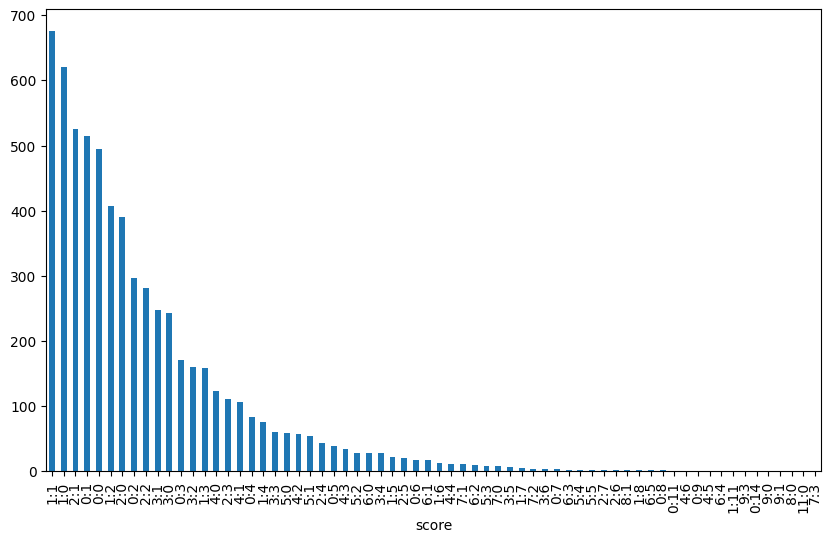

In [6]:
import matplotlib.pyplot as plt

# Obtenemos los resultados de los eventos
df_resultados = df[['fixture.id', 'goals.home', 'goals.away']].drop_duplicates()

# Obtenemos el número de filas (partidos) de los que disponemos: 6380
print(len(df_resultados))

# Contamos las filas de las que no tenemos resultados,
# comprobamos cuántas son (por si no fueran pocas) y las eliminamos
non_integer_rows = df_resultados[(df_resultados['goals.home'] % 1 != 0) | (df_resultados['goals.away'] % 1 != 0) | df_resultados['goals.home'].isna() | df_resultados['goals.away'].isna()]
print(len(non_integer_rows))
df_resultados = df_resultados[(df_resultados['goals.home'] % 1 == 0) & (df_resultados['goals.away'] % 1 == 0) & df_resultados['goals.home'].notna() & df_resultados['goals.away'].notna()]

# Volvemos a imprimir el número de filas disponibles para comprobar que la eliminación ha sido correcta
print(len(df_resultados))

# A continuación creamos la variable score como goles_casa:goles_fuera
df_resultados['score'] = df_resultados['goals.home'].astype(int).astype(str) + ':' + df_resultados['goals.away'].astype(int).astype(str)

# Y obtenemos el histograma
plt.figure(figsize=(10, 6))
df_resultados['score'].value_counts().plot(kind='bar')
plt.show()

Vemos que el resultado más repetido en los 6000 y pico partidos es el 1:1, luego el 1:0, 2:1, ... y que luego hay muchos resultados abultados que se dan muy poco. Vamos a eliminarlos porque no queremos que ensucien nuestra predicción. Por ejemplo, vamos quedarnos con aquellos que tienen una frecuencia de aparición mayor a 50 y volvemos a sacar el histograma

5917


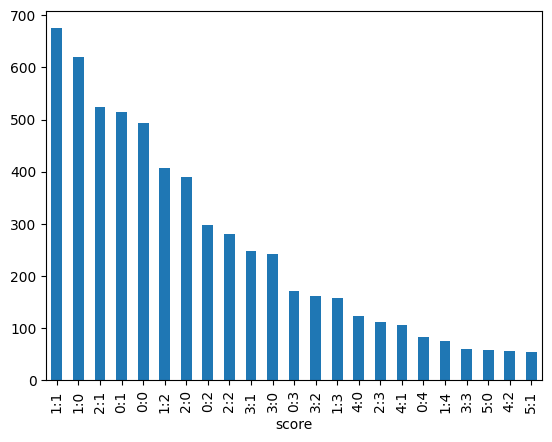

In [7]:
# Nos quedamos con los partidos cuyo resultado se repetite más de 50 veces
score_counts = df_resultados['score'].value_counts()
scores_to_keep = score_counts[score_counts > 50].index
df_resultados = df_resultados[df_resultados['score'].isin(scores_to_keep)]

# Vemos con cuántos nos hemos quedado para comprobar que seguimos teniendo un número de partidos razonable
print(len(df_resultados))

# Volvemos a pintar el histograma
df_resultados['score'].value_counts().plot(kind='bar')
plt.show()

Con esto, tenemos resultados a los que estamos más acostumbrados. Nos queda filtrar nuestro dataframe para quedarnos con aquellas filas que están en df_resultados y añadiendo la columna "score", para lo cual volvemos a utilizar un join de pandas de tipo inner

In [8]:
print(len(df))

df = pd.merge(df, df_resultados[['fixture.id', 'score']], on='fixture.id', how='inner')

print(len(df))

14605095
13679082


Vemos cómo hemos eliminado aproximadamente un millón de filas. 

A continuación estudiamos los diferentes tipos de apuestas de las que disponemos:

In [9]:
df['bet.name'].unique()

<StringArray>
[                  'Match Winner',                      'Home/Away',
               'Goals Over/Under',    'Goals Over/Under First Half',
 'Goals Over/Under - Second Half',               'Both Teams Score',
                  'Double Chance',        'To Score in Both Halves',
                 'Asian Handicap',                   'HT/FT Double',
 ...
            'Offsides Away Total',         'Offsides Double Chance',
     'ShotOnTarget Double Chance',              'Offsides Odd/Even',
           'Red Cards Over/Under',                     'To Qualify',
              'Method of Victory',                 'Player Triples',
                  'Player Points',                 'Saves Odd/Even']
Length: 180, dtype: string

Son demasiados valores ya que nosotros vamos a realizar nuestra predicción en base a los valores de estas apuestas en los distintos tipos de apuestas. Por tanto, hemos de restringir los tipos de apuestas. Para ello, haremos un estudio de los tipos más predominantes y, de ellos, nos quedaremos con los 10 que consideremos que más influencia puede tener en nuestra variable objetivo.

In [10]:
df['bet.name'].value_counts().head(50)

bet.name
Exact Score                          2410445
Goals Over/Under                     1144998
Correct Score - First Half            982544
Asian Handicap                        810867
Goals Over/Under First Half           539961
HT/FT Double                          450795
Goals Over/Under - Second Half        388892
Asian Handicap First Half             330675
Total - Home                          311190
Total - Away                          288350
Handicap Result                       282067
Result/Total Goals                    264329
Correct Score - Second Half           254817
Match Winner                          249350
Corners Over Under                    237344
Double Chance                         228065
First Half Winner                     219299
Asian Handicap (2nd Half)             139890
Second Half Winner                    136966
Total Corners (3 way)                 128286
Both Teams Score                      125740
Double Chance - First Half            123217
L

Vemos cómo las primeras apariciones están relacionadas con el resultado final (desde "Exact Score", con 2.410.445, a "Correct Score - Second Half", con 254.817) así que filtraremos nuestro dataframe para quedarnos con aquellas filas cuyo tipo de apuesta tenga más de 250.000 apariciones.

NOTA: Algunos tipos de apuesta de los que nos vamos a quedar parecen redundantes pero los vamos a dejar porque verdaderamente no se apuesta lo mismo: por ejemplo, "Result/Total Goals" tiene valores como "Home/Over 1.5", lo cual es distinto a "Exact Score" que tiene valores como "2:1"

In [11]:
# Obtenemos el índice de las filas con las que nos quedaremos
bet_id_counts = df['bet.id'].value_counts()
bet_id_to_keep = bet_id_counts[bet_id_counts > 250000].index

# Imprimimos los bet.id para luego utilizarlos como filtro en etapas posteriores
print(bet_id_to_keep)

# Realizado el filtrado
df = df[df['bet.id'].isin(bet_id_to_keep)]

# Imprimos el tamaño de nuestro dataframe para comprobar que seguimos teniendo un número de registros considerable tras el filtrado
print(len(df))

Index([10, 5, 31, 4, 6, 7, 26, 19, 16, 17, 9, 25, 62], dtype='int32', name='bet.id')
8459930


Vemos como aún seguimos manteniendo un número razonable de registros. Esto quiere decir que, aunque la API tiene capacidad de devolvernos muchos tipos de apuestas, al menos con el conjunto de datos que hemos capturado durante 4 semanas, más de la mitad de las apuestas están concentrados en unos pocos tipos de apuestas.

Vamos a realizar el mismo ejercicio con las casas de apuestas:

In [12]:
df['bookmaker.name'].value_counts()

bookmaker.name
1xBet           1982221
Marathonbet      773766
Bet365           706046
Betway           672586
Betano           606819
10Bet            511111
Pinnacle         428433
Betfair          374463
Unibet           370080
Tipico           324008
William Hill     319571
NordicBet        317085
Betsson          316808
Fonbet           285372
SBO              225059
Betcris          166036
Dafabet           80466
Name: count, dtype: Int64

En esta ocasión vemos que hay dos casos extremos, uno por cada lado pero en el centro todo está bastante similar. Vamos a representarlo en un histograma para verlo mejor:

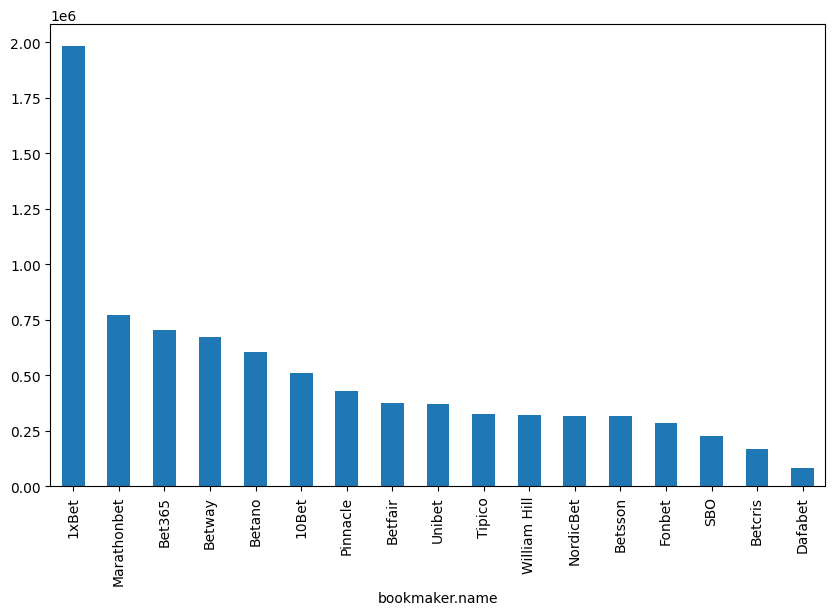

In [13]:
plt.figure(figsize=(10, 6))
df['bookmaker.name'].value_counts().plot(kind='bar')
plt.show()

Como la casa de apuestas puede contener información relevante del resultado y la distribución es bastante homogénea, quitando los dos extremos, decidimos no realizar filtrado alguno en función de las casas de apuestas.

Finalmente, tras el "Exploratory Data Analysis", imprimimos el aspecto actual de nuestro dataframe

In [14]:
df.head(10)

,value,odd,fixture.id,bookmaker.id,bookmaker.name,bet.id,bet.name,fixture.referee,fixture.timezone,fixture.date,...,goals.away,score.halftime.home,score.halftime.away,score.fulltime.home,score.fulltime.away,score.extratime.home,score.extratime.away,score.penalty.home,score.penalty.away,score
5,Over 2.5,2.15,1132651,27,NordicBet,5,Goals Over/Under,Mohamed Adel,UTC,2024-07-16 18:00:00+00:00,...,2.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,1:2
6,Under 2.5,1.63,1132651,27,NordicBet,5,Goals Over/Under,Mohamed Adel,UTC,2024-07-16 18:00:00+00:00,...,2.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,1:2
7,Over 0.5,1.48,1132651,27,NordicBet,6,Goals Over/Under First Half,Mohamed Adel,UTC,2024-07-16 18:00:00+00:00,...,2.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,1:2
8,Under 0.5,2.50,1132651,27,NordicBet,6,Goals Over/Under First Half,Mohamed Adel,UTC,2024-07-16 18:00:00+00:00,...,2.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,1:2
9,Over 1.5,2.36,1132651,27,NordicBet,26,Goals Over/Under - Second Half,Mohamed Adel,UTC,2024-07-16 18:00:00+00:00,...,2.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,1:2
10,Under 1.5,1.54,1132651,27,NordicBet,26,Goals Over/Under - Second Half,Mohamed Adel,UTC,2024-07-16 18:00:00+00:00,...,2.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,1:2
23,Home +0.5,2.35,1132651,1,10Bet,4,Asian Handicap,Mohamed Adel,UTC,2024-07-16 18:00:00+00:00,...,2.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,1:2
24,Away +0.5,1.57,1132651,1,10Bet,4,Asian Handicap,Mohamed Adel,UTC,2024-07-16 18:00:00+00:00,...,2.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,1:2
25,Home +1,1.85,1132651,1,10Bet,4,Asian Handicap,Mohamed Adel,UTC,2024-07-16 18:00:00+00:00,...,2.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,1:2
26,Away +1,1.93,1132651,1,10Bet,4,Asian Handicap,Mohamed Adel,UTC,2024-07-16 18:00:00+00:00,...,2.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,1:2


## Feature Engineering

Observando el resultado del dataframe anterior vemos que tenemos una fila por cada apuesta pero lo que verdaderamente necesitamos para nuestro objetivo es, por cada fila, un partido con un conjunto de columnas que represente las apuestas que se han realizado de dicho partido (nuestras variables *features*), aparte de la variable *target* (la columna *score* que ya tenemos disponible)

Para ello, en primer lugar creamos una nueva variable que sea el resumen de la apuesta realizada: "casa de apuestas" _ "tipo de apuesta" _ "valor de la apuesta", pero por simplificar lo que luego será el nombre de columnas, vamos a trabajar con los ids de las casas de apuestas y tipos de apuestas, aunque si quisiéramos obtener los nombres, podemos acudir a nuestro dataframe original o la API que también tiene endpoints para ello. Además, trabajando con los ids, garantizamos la identificación única de la entidad.

In [15]:
df['bet'] = df['bookmaker.id'].astype(str) + '_' + df['bet.id'].astype(str) + '_' + df['value'].astype(str).str.replace(' ', '')

#Comprobamos si hay resultados duplicados en base a la nueva columna y fixture.id
duplicates = df[df.duplicated(subset=['fixture.id', 'bet'])]

print(len(duplicates))

27664


Efectivamente hay duplicados así que vamos a investigar a qué "fixture.id" pertenecen:

In [16]:
print(duplicates['fixture.id'].unique())

[1209098 1209099 1209100 1209102 1209103 1209104 1209105 1209545 1215128
 1215129 1215130 1215158 1217974 1218188 1152199 1268021 1214580 1223352
 1232692 1145304]


Cogemos unos cuantos al azar y comprobamos que efectivamente están duplicados en distintos jsons de las fuente de datos. Ejemplo:

- El 1209098 está repetido en la página 7 y 8 de las apuestas del día 2024-07-17, es decir, en los ficheros odds_2024-07-17_7.json y odds_2024-07-17_8.json

- El 1215158 está repetido en la página 9 y 10 de las apuestas del día 2024-07-17, es decir, en los ficheros odds_2024-07-17_9.json y odds_2024-07-17_10.json

- El 1145304 está repetido en los ficheros odds_2024-08-09_1.json y odds_2024-08-12_1.json

Por tanto, confirmamos que la API nos ha dado datos repetidos así que ya podemos eliminarlos con más tranquilidad

In [17]:
df = df.drop_duplicates(subset=['fixture.id', 'bet'])

A continuación "pivotamos" el dataframe sobre la nueva columna "bet", manteniendo datos del partido que también podrían ser interesantes features para la predicción, aparte de las apuestas, como por ejemplo, el árbitro (puede ser casero), la hora en la que se juega (quizá nos sorprenda conocer que en función de la hora se da más un resulatdo que otro), el estadio, la liga, etc.

Al igual que antes, siempre que podamos tomaremos el id en lugar del nombre para evitar confundir dos entidades distintas pero con el mismo nombre, que es difícil que se de, pero por si acaso.

In [18]:
df = df.pivot(index=['fixture.id', 'fixture.referee', 'fixture.date', 'fixture.venue.id', 'league.id', 'league.round', 'teams.home.id', 'teams.away.id', 'score'], columns='bet', values='odd')
df.reset_index(inplace=True)

Respecto a la fecha puede ser interesante sacar el mes en el que se juega el partido (tiene sentido que cuando una liga ya está avanzada se vayan creando diferencias entre los equipos pequeños y los grandes, con más presupuesto y capacidad de afrontar lesiones graves) o incluso la hora (quizá hay equipos a los que no le sienta jugar a una hora). El año lo podríamos obviar porque buscamos patrones repetitivos, independientemente del año.

Por tanto, a continuación vamos a añadir 2 nuevas columnas de mes y hora y eliminamos la fixture.date que ya no la vamos a necesitar. Aprovechamos también para eliminar la fixture.id que tampoco utilizaremos

In [19]:
df['month']=df['fixture.date'].dt.month
df['hour']=df['fixture.date'].dt.time

df = df.drop(['fixture.date', 'fixture.id'], axis=1)

Como último paso del "Feature Engineering", vamos a convertir nuestra variable objetivo "score" en una variable tipo factor, a la vez que rellenamos los valores "NA" de las columnas numéricas con 0

In [20]:
import numpy as np

df['score'] = df['score'].astype('category')

df = df.fillna({col: 0 for col in df.select_dtypes(include=np.number).columns})

Tras esta etapa de "Feature Engineering", vemos cómo se nos ha quedado nuestro dataframe

In [ ]:
print(df.info())

Es un dataframe de unas 6000 filas pero muchas columnas 3212. Si quisiéramos reducir el número de columnas podemos focalizarnos en las principales casas de apuestas y no coger todas. De igual forma, para un entrenamiento más adecuado necesitaríamos muchas más filas, lo cual, en un entorno de producción se puede obtener simplemente capturando más datos de nuestra API,

Finalmente, volvemos a sacar un head de nuestro dataframe para ver el resultado tras el "Feature Engineering" y lo exportamos a CSV para poder tener un punto de entrada para la siguiente etapa de modelado

In [21]:
df.head(10)

bet,fixture.referee,fixture.venue.id,league.id,league.round,teams.home.id,teams.away.id,score,11_10_0:0,11_10_0:1,11_10_0:10,...,9_6_Under0.5,9_6_Under0.75,9_6_Under1.0,9_6_Under1.25,9_6_Under1.5,9_6_Under1.75,9_6_Under2.0,9_6_Under2.25,month,hour
0,Mohamed Adel,477.0,233,Regular Season - 17,16431,1577,1:2,7.6,5.0,100.0,...,2.69,2.25,1.77,1.48,0.00,0.00,0.0,0.0,7,18:00:00
1,<NA>,0.0,194,Regular Season - 19,3789,3785,4:0,18.0,12.0,100.0,...,0.00,0.00,0.00,0.00,1.86,0.00,0.0,0.0,7,06:00:00
2,<NA>,2566.0,194,Regular Season - 19,3794,3788,1:1,15.0,10.0,100.0,...,0.00,0.00,0.00,2.00,0.00,0.00,0.0,0.0,7,05:30:00
3,<NA>,2563.0,194,Regular Season - 19,3791,16770,4:2,14.0,15.0,100.0,...,0.00,0.00,0.00,1.98,0.00,0.00,0.0,0.0,7,05:30:00
4,<NA>,7050.0,194,Regular Season - 19,10010,3786,3:0,16.5,12.0,100.0,...,0.00,0.00,0.00,2.08,0.00,0.00,0.0,0.0,7,05:30:00
5,<NA>,2565.0,194,Regular Season - 19,3793,3787,1:0,21.0,46.0,100.0,...,0.00,0.00,0.00,0.00,2.01,0.00,0.0,0.0,7,07:30:00
6,<NA>,2565.0,194,Regular Season - 20,3795,3793,1:3,24.0,12.0,100.0,...,0.00,0.00,0.00,0.00,0.00,1.88,0.0,0.0,7,05:30:00
7,<NA>,0.0,194,Regular Season - 20,3786,3789,4:2,18.0,15.0,100.0,...,0.00,0.00,0.00,0.00,1.89,0.00,0.0,0.0,7,07:30:00
8,<NA>,2562.0,194,Regular Season - 20,3788,3791,0:1,15.0,9.0,100.0,...,0.00,0.00,0.00,2.00,0.00,0.00,0.0,0.0,7,05:30:00
9,<NA>,11889.0,194,Regular Season - 20,16770,10010,3:1,16.5,12.0,100.0,...,0.00,0.00,0.00,0.00,1.80,0.00,0.0,0.0,7,07:30:00


In [22]:
df.to_csv('df_eda_and_feature_engineering.csv', index=False)

## Model

In [23]:
import pandas as pd

# Cargamos el dataframe resultante de la etapa anterior
df = pd.read_csv('df_eda_and_feature_engineering.csv')

Tras probar con distintos modelos compatibles con clasificación multiclase (Random Forest, Redes Neuronales, Gradient Boosting Machines y SVM), el que ha ofrecido mejores resultados ha sido el Random Forest, que además es bastante robusto a sobreentramiento. Además, para buscar un adecuado números de árboles utilizaremos GridSearchCV con 5 folds para la "Cross Validation"

NOTA: Como hemos indicado anteriormente, en este TFM nos centramos en la pipeline y no en obtener un modelo de alta precisión así que con la evaluación de los modelos realizada, más el GridSearchCV, lo consideramos suficiente para nuestro ejercicio.

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import check_random_state
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import time

# Fijamos la semilla
rs = check_random_state( 1352 )

# En primer lugar definimos nuestras variables objetivo (Y) y las características (X)
y = df['score']
X = df.drop('score', axis=1)

# One-hot conding: Convertimos las variables object, string y categóricas en booleanos con la función get_dummies
# y poniendo el parámetro drop_first a True para evitar crear variables ficticias
X = pd.get_dummies(X, drop_first=True)

# Como la muestra no está balanceada respecto a nuestra variable objetivo (score),
# utilizamos el sobremuestrador SMOTE (Synthetic Minority Over-sampling Technique)
# ya que es importante para el Random Forest que las clases estén balanceadas
smote = SMOTE(random_state=rs)
X, y = smote.fit_resample(X, y)

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rs)

# Definimos el espacio de búsqueda para los hiperparámetros.
# Probamos con 4 conjuntos de árboles: 10, 100, 250 y 500
param_grid = {'n_estimators': [10, 100, 250, 500] }

# Configurar GridSearchCV con 5 folds para la Validación Cruzada y con todos los jobs disponibles
grid_search = GridSearchCV( RandomForestClassifier(), param_grid, cv=5, n_jobs=-1, return_train_score=True )

# Y por fin el entrenamiento, imprimiendo el tiempo en segundos que nos ha llevado
start = time.perf_counter()
grid_search.fit(X_train, y_train)
print("Tiempo de proceso: {:.2f} segundos".format(time.perf_counter()-start))

Tiempo de proceso: 408.84 segundos


A continuación evaluamos el resultado del GridSearch realizado para conocer el mejor número de árboles y cuáles son las putuaciones obtenidas para cada uno de los valores evaluados

In [25]:
print("Mejores parámetros encontrados:\n", grid_search.best_params_)

results = pd.DataFrame( grid_search.cv_results_ )
print("\nPuntuaciones para cada hiperparámetro:")
for row in results.itertuples():
        print("%0.3f (+/-%0.03f) for %r"
              % (row.mean_test_score, row.std_test_score * 2, row.params))

Mejores parámetros encontrados:
 {'n_estimators': 500}

Puntuaciones para cada hiperparámetro:
0.470 (+/-0.021) for {'n_estimators': 10}
0.590 (+/-0.023) for {'n_estimators': 100}
0.605 (+/-0.013) for {'n_estimators': 250}
0.610 (+/-0.018) for {'n_estimators': 500}


Una vez conocemos el mejor valor del parámetro de número de árboles, con su tasa de acierto, lo utilizamos para entrenar nuestro modelo Random Forest y medimos los resultados finales obtenidos

In [26]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

best_param = grid_search.best_params_['n_estimators']
rf = RandomForestClassifier(n_estimators=best_param).fit( X_train, y_train )

y_pred = rf.predict(X_test)

print("Precisión:", accuracy_score(y_test, y_pred))
print("Informe de Clasificación:\n", classification_report(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))

Precisión: 0.6341777586947188
Informe de Clasificación:
               precision    recall  f1-score   support

         0:0       0.37      0.24      0.29       233
         0:1       0.26      0.25      0.25       189
         0:2       0.49      0.52      0.50       196
         0:3       0.68      0.80      0.73       203
         0:4       0.84      0.96      0.90       218
         1:0       0.17      0.18      0.18       203
         1:1       0.15      0.15      0.15       188
         1:2       0.47      0.41      0.44       203
         1:3       0.71      0.79      0.75       193
         1:4       0.85      0.98      0.91       188
         2:0       0.33      0.35      0.34       213
         2:1       0.27      0.17      0.21       210
         2:2       0.66      0.51      0.58       213
         2:3       0.90      0.90      0.90       196
         3:0       0.72      0.64      0.67       217
         3:1       0.66      0.47      0.55       224
         3:2       0.80 

Los resultados obtenidos no están mal teniendo en cuenta el dominio que nos ocupa. La matriz de confusión también tiene valores aceptables teniendo en cuenta que casi todos los valores caen en la diagonal.

Como último paso de esta etapa de modelado guardamos todo lo que necesitamos persistir para posteriormente resalizar predicciones. En concreto: el modelo como tal y las columnas de nuestro dataframe de features

In [27]:
from joblib import dump

dump(rf, 'model.joblib')
dump(X_train.dtypes.to_dict(), 'columns.joblib')

['columns.joblib']

# Evaluation

Como indicamos anteriormente, para evaluar nuestro modelo intentaremos predecir el partido de la Supercopa de Europa, entre el Madrid y el Atalanta que, a día de hoy, ya se ha disputado con victoria para el Madrid por 2-0.

Para ello, en primer lugar cargamos los ficheros json tanto de las apuestas como de la información del partido que nos ocupa y lo pasamos a un dataframe de evaluación, tal y como hicimos anteriormente con las apuestas y partidos partidos de 4 semanas que nos han servido para entrenar nuestro modelo

In [28]:
import pandas as pd
import json
from pandas import json_normalize

odds_file_name = 'UEFA_Super_Cup_odds.json'
fixture_file_name = 'UEFA_Super_Cup_fixture.json'

# Variable donde vamos a tener el dataframe final
df_eval = pd.DataFrame()

# Leer cada archivo JSON de apuestas y procesarlo
with open(odds_file_name, 'r') as file:
    print(f'Procesamos el fichero {odds_file_name}')
    json_odds = json.load(file)
    # Con las siguientes líneas obtenemos un dataframe df_odds con información de las apuestas
    bookmakers_data = json_normalize(json_odds['response'],
                        record_path=['bookmakers'],
                        meta=[['fixture', 'id']])
    bookmakers_data.rename(columns={'id':'bookmaker.id','name': 'bookmaker.name'}, inplace=True)
    bets_data = json_normalize(bookmakers_data.to_dict(orient='records'),
                        record_path=['bets'],
                        meta=['fixture.id', 'bookmaker.id', 'bookmaker.name'])
    bets_data.rename(columns={'id':'bet.id','name': 'bet.name'}, inplace=True)
    df_odds = json_normalize(bets_data.to_dict(orient='records'),
                        record_path=['values'],
                        meta=['fixture.id', 'bookmaker.id', 'bookmaker.name', 'bet.id', 'bet.name'])
    # A continuación, vamos a concatenarle la información que tenemos disponible del JSON del evento, conforme a todas las propiedades fixture.id que tenemos.
    # Para ello, formaremos otro df_fixtures y luego lo fusionaremos con nuestro df_odds
    df_fixtures = pd.DataFrame()
    with open(fixture_file_name, 'r') as file_fixture:
        json_fixture = json.load(file_fixture)
        fixture_data = json_normalize(json_fixture['response'])
        df_fixtures = pd.concat([df_fixtures, fixture_data], ignore_index=True)
        

    df_fixtures.drop(columns=['events', 'lineups', 'statistics', 'players'], inplace=True) # Eliminamos las propiedades que ya hemos justificado previamente que no vamos a necesitar
    df_merged = pd.merge(df_odds, df_fixtures, on='fixture.id') # Unimos los dataframes de apuestas y eventos utilizando como columna de join fixture.id, de tipo inner (el valor por defecto del parámetro how)

    df_eval = pd.concat([df_eval, df_merged], ignore_index=True)

# Imprimimos la información resultante de nuestro df
print(df_eval.info())

Procesamos el fichero UEFA_Super_Cup_odds.json
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5714 entries, 0 to 5713
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   value                   5714 non-null   object
 1   odd                     5714 non-null   object
 2   fixture.id              5714 non-null   object
 3   bookmaker.id            5714 non-null   object
 4   bookmaker.name          5714 non-null   object
 5   bet.id                  5714 non-null   object
 6   bet.name                5714 non-null   object
 7   fixture.referee         5714 non-null   object
 8   fixture.timezone        5714 non-null   object
 9   fixture.date            5714 non-null   object
 10  fixture.timestamp       5714 non-null   int64 
 11  fixture.periods.first   0 non-null      object
 12  fixture.periods.second  0 non-null      object
 13  fixture.venue.id        5714 non-null   int64 
 14  fixture.v

Una vez que tenemos la información cargada en un dataframe de evaluación, pasamos por la misma pipeline que hemos hecho para crear el modelo, con el objetivo de tener una fila con el partido que nos ocupa y las mismas columnas con las que hemos entrenado nuestro modelo:

In [29]:
import numpy as np
from joblib import load

#EDA: Ajuste de los tipos de datos
df_eval = df_eval.astype({
    'value': 'string','odd': 'float','fixture.id': 'int','bookmaker.id': 'int','bookmaker.name': 'string','bet.id': 'int','bet.name': 'string','fixture.referee': 'string',
    'fixture.timezone': 'string','fixture.timestamp': 'int','fixture.periods.first': 'float','fixture.periods.second': 'float','fixture.venue.id': 'float','fixture.venue.name': 'string',
    'fixture.venue.city': 'string','fixture.status.long': 'string','fixture.status.short': 'string','fixture.status.elapsed': 'float','league.name': 'string',
    'league.country': 'string','league.logo': 'string','league.flag': 'string','league.round': 'string','teams.home.id': 'int','teams.home.name': 'string',
    'teams.home.logo': 'string','teams.home.winner': 'bool','teams.away.id': 'int','teams.away.name': 'string','teams.away.logo': 'string','teams.away.winner': 'bool',
    'goals.home': 'float','goals.away': 'float','score.halftime.home': 'float','score.halftime.away': 'float','score.fulltime.home': 'float',
    'score.fulltime.away': 'float','score.extratime.home': 'float','score.extratime.away': 'float','score.penalty.home': 'float','score.penalty.away': 'float'
})
df_eval['fixture.date'] = pd.to_datetime(df_eval['fixture.date'])

# EDA: Nos quedamos con los tipos de apuestas más populares
bet_id_to_keep = [10, 5, 31, 4, 6, 7, 26, 19, 16, 17, 9, 25, 62]
df_eval = df_eval[df_eval['bet.id'].isin(bet_id_to_keep)]

# Feature Engineering: Creación de la columna bet
df_eval['bet'] = df_eval['bookmaker.id'].astype(str) + '_' + df_eval['bet.id'].astype(str) + '_' + df_eval['value'].astype(str).str.replace(' ', '')
df_eval = df_eval.drop_duplicates(subset=['fixture.id', 'bet'])

# Feature Engineering: Pivotamos el df_eval
df_eval = df_eval.pivot(index=['fixture.id', 'fixture.referee', 'fixture.date', 'fixture.venue.id', 'league.id', 'league.round', 'teams.home.id', 'teams.away.id'], columns='bet', values='odd')
df_eval.reset_index(inplace=True)

# Feature Engineering: Creación de las columnas month, hour
df_eval['month']=df_eval['fixture.date'].dt.month
df_eval['hour']=df_eval['fixture.date'].dt.time
df_eval = df_eval.drop(['fixture.date', 'fixture.id'], axis=1)

# Feature Engineering: Rellenamos los NAs de las columnas numéricas con 0's
df_eval = df_eval.fillna({col: 0 for col in df_eval.select_dtypes(include=np.number).columns})

# Model: One-hot conding: Convertimos las variables object, string y categóricas en booleanos con la función get_dummies
# NOTA: En esta ocasión tenemos que dejar la primera fila porque si no nos quedamos
df_eval = pd.get_dummies(df_eval, drop_first=False)

# Como es más que probable que las columnas no coincidan, utilizamos las que guardamos en el proceso de entranamiento y
# añadimos las columnas que faltan, elimninamos las que sobran y ajustamos los tipos
dict_columnas = load('columns.joblib')
columnas = list(dict_columnas.keys())
df_eval_completo = pd.DataFrame(columns=columnas)
df_eval = df_eval_completo.combine_first(df_eval)
df_eval = df_eval[columnas]
# Ajustamos los tipos
for columna, tipo in dict_columnas.items():
    if tipo == 'int64':
        df_eval[columna] = df_eval[columna].astype('int64')
    elif tipo == 'float64':
        df_eval[columna] = df_eval[columna].astype('float64')
    elif tipo == 'boolean':
        df_eval[columna] = df_eval[columna].astype('boolean')
    elif tipo == 'bool':
        df_eval[columna] = df_eval[columna].astype('bool')
    elif tipo == 'object':
        df_eval[columna] = df_eval[columna].astype('object')
# Finalmente rellenamos las columnas booleanas con False y las de tipo entero a 0
columnas_booleanas = df_eval.select_dtypes(include=['boolean','bool']).columns
df_eval[columnas_booleanas] = df_eval[columnas_booleanas].fillna(False)
df_eval = df_eval.fillna({col: 0 for col in df_eval.select_dtypes(include=np.number).columns})

Finalmente realizamos la predicción con el modelo que habíamos guardado

In [30]:
modelo = load('model.joblib')
resultado = modelo.predict(df_eval)
print(resultado)

['4:1']


Como vemos, hemos conseguido predecir el equipo vencedor y que el la diferencia de goles es mayor a 1 pero no el resultado final ya que el madrid ganó 2-0 y la predicción nos da un 4-1 pero hay que tener en consideración lo que ya hemos comentado de que el dominio que nos ocupa de apuestas deportivas contiene una componente importante de aleatoriedad.

Una vez que tenemos ya nuestro modelo entrenado y con resultados aceptables, pasamos a la siguiente etapa del proceso: el despliegue

# Deployment

Para el deployment de nuestro modelo utilizaremos Google Cloud. Ver la demostración en el vídeo

El modelo se puede consumir a través de la siguiente URL:

https://europe-southwest1-prefab-breaker-433816-j4.cloudfunctions.net/football-result-predict

Y admite dos *query params*, que se pueden combinar como se desee:
- day=yyy-mm-dd: día para obtener resultados que se disputan ese día, con sus predicciones. Por limitaciones de la fuente de datos, el día debe estar entre 1 semana previa al día de hoy y 2 posteriores.
- team=name: para obtener predicciones de un equipo. Si, además, se incluye el parámetro *day*, se buscarán los partidos de ese día para el equipo en cuestión. Si no, se buscarán los partidos del equipo en las siguientes 2 semanas. Lógicamente, el nombre del equipo debe ser tal cual el que entiende nuestra fuente de datos. Ejemplo: "Real Madrid" o "Barcelona"

NOTA: Si no se especifica ningún parámetro se mostrarán las predicciones para los partidos del día de hoy

# Model Management

Como última etapa, debemos monitorizar el modelo implementado para evaluar su validez y exactitud a lo largo del tiempo. Para el caso que nos ocupa, la forma de llevar a cabo de esta última etapa dependerá de la estretegia de apuestas que se escoja, cosa que queda fuera del alcance de este TFM.

En cualquier caso, esta etapa se podría implementar también como una pipeline similar a la que ya hemos definido, pero incorporando unos umbrales de "accuracy" mínima preconfigurados de forma que si no se alcanzan dichos umbrales, por ejemplo, envíe una alerta. Además, para el ajuste periódico del modelo, también se podrían incorporar de forma automática a nuestro dataframe de entrenamiento las apuestas de los últimos partidos disputados.